# Projeto Titanic
**O que você vai ver neste módulo?**:
- <a href="#visao-geral">Visão geral do projeto</a>
- <a href="#analisando-dados">Analisando e entendendo os dados</a>
- <a href="#algoritmo">Implementando o primeiro algoritmo de Machine Learning</a>
- <a href="#resultados">Gerando e submetendo os resultados</a>

## Visão geral do projeto <a name='visao-geral' />

> O naufrágio do RMS Titanic é um dos naufrágios mais infames da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulação. Esta sensacional tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

> Uma das razões que o naufrágio levou a tal perda de vida era que não havia bastantes barcos salva-vidas para os passageiros e tripulação. Embora houvesse algum elemento de sorte envolvido em sobreviver ao afundamento, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

> Neste desafio, pedimos que você complete a análise de quais tipos de pessoas poderiam sobreviver. Em particular, pedimos que você aplique as ferramentas de aprendizado de máquina para prever quais passageiros sobreviveram à tragédia.

Os dados deste projeto podem ser vistos no Kaggle <a href="https://www.kaggle.com/c/titanic">aqui</a> e já estão disponíveis na pasta "data\titanic\"

**Neste primeiro momento o nosso foco é entender todo o ciclo que é utilizado quando é abordado um problema que será resolvido através de Machine Learning. Não se preocupe em memorizar os comandos ou qualquer coisa relacionada ao código. Vamos focar no processo!**

## Analisando e entendendo os dados<a name='analisando-dados' />

### Carregando os dados

In [1]:
import pandas as pd

# Carregando os dados de treinamento e de testes
train_df = pd.read_csv('../data/titanic/train.csv')
test_df = pd.read_csv('../data/titanic/test.csv')

In [2]:
# Vamos agora visualizar alguns itens de treinamento
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [43]:
# Vamos agora visualizar alguns itens da base de teste
test_df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,892,3,0,34,0,0,7.8292,3,1,1,1,1
1,893,3,1,47,1,0,7.0000,1,3,2,0,1
2,894,2,0,62,0,0,9.6875,3,1,1,1,2


### Entendendo as características (Features)

Antes de mais nada, precisamos entender o que significa cada coluna para que possamos extrair o máximo de informações possíveis e gerar outras informações que permitam trazer uma acertividade maior dos nossos algoritmos.

> **PassengerID**: Um identificador unico do passageiro no banco de dados.

> **Survived**: Esta coluna está apenas na base de treinamento e diz se o passageiro sobreviveu ou não.

> **Pclass**: Qual a classe o passageiro está (1 primeira classe, 2 segunda classe e 3 terceira classe)

> **Sex**: Sexo do passageiro

> **SibSp**: Número de irmãos ou esposas no barco

> **Parch**: Número de pais ou filhos dentro do barco

> **Ticket**: Numero do Ticket

>**Fare**: Tarifa paga pelo passageiro

>**Cabin**: Número da cabine

>**Embarked**: Porto onde o passageiro embarcou

### Gerando alguns graficos e entendendo algumas caracteristicas

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Porcentagem de sobrevivencia: 0.3838383838383838


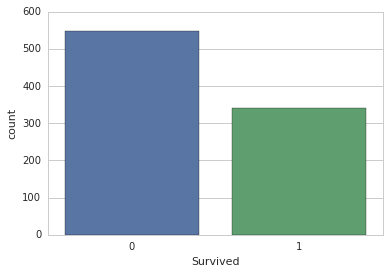

In [5]:
# Vamos descobrir a distribuição dos que sobreviveram (1) e os que morreram (0)
print('Porcentagem de sobrevivencia:', len(train_df[train_df.Survived == 1]) / len(train_df))

sns.countplot(x="Survived", data=train_df)

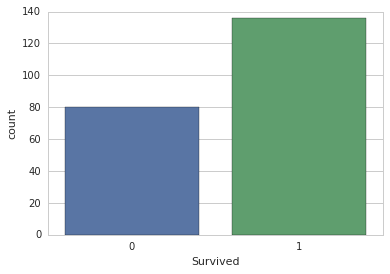

In [6]:
# Qual a porcentagem de sobrevivencia das pessoas que estavam na primeira classe?
sns.countplot(x="Survived", data=train_df[train_df.Pclass == 1])

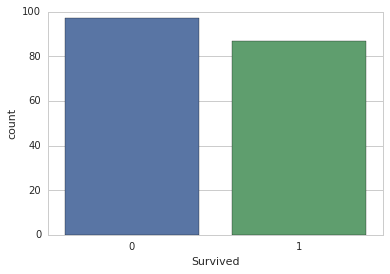

In [7]:
# Qual a porcentagem de sobrevivencia das pessoas que estavam na segunda classe?
sns.countplot(x="Survived", data=train_df[train_df.Pclass == 2])

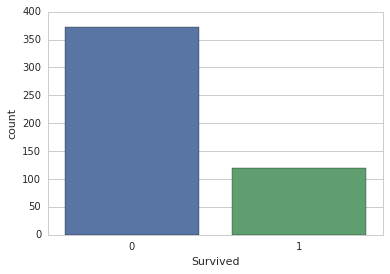

In [8]:
# Qual a porcentagem de sobrevivencia das pessoas que estavam na terceira classe?
sns.countplot(x="Survived", data=train_df[train_df.Pclass == 3])

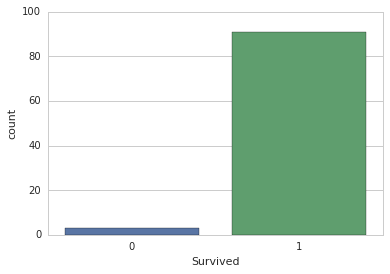

In [9]:
# As mulheres da primeira classe tiveram realmente um alto indice de sobrevivencia?
sns.countplot(x="Survived", data=train_df[(train_df.Pclass == 1) & (train_df.Sex == 'female')])

In [10]:
# Por que sera que algumas das mulheres da primeira classe morreram?
train_df[(train_df.Sex == 'female') & (train_df.Survived == 0) & (train_df.Pclass == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S


In [11]:
train_df[train_df.Ticket == '113781'].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S


## Entendendo os NaNs

É muito comum nas bases de dados existirem informações faltando, os NaN o que fazer com esta informação depende da base de dados que você está trabalhando. Sempre podemos ignorar ou preencher com as informações que estão faltando.

In [12]:
# O que sao os NaNs? Quais campos possuem esta informacao?
for field in train_df.columns:
    print(field, 'NaN:', train_df[field].isnull().sum())

PassengerId NaN: 0
Survived NaN: 0
Pclass NaN: 0
Name NaN: 0
Sex NaN: 0
Age NaN: 177
SibSp NaN: 0
Parch NaN: 0
Ticket NaN: 0
Fare NaN: 0
Cabin NaN: 687
Embarked NaN: 2


In [13]:
for field in test_df.columns:
    print(field, 'NaN:', test_df[field].isnull().sum())

PassengerId NaN: 0
Pclass NaN: 0
Name NaN: 0
Sex NaN: 0
Age NaN: 86
SibSp NaN: 0
Parch NaN: 0
Ticket NaN: 0
Fare NaN: 1
Cabin NaN: 327
Embarked NaN: 0


### O que faremos com os NaNs do campo Embarked?

O local de embarque, tem apenas 2 pessoas sem preencher, esta informação definitivamente é irrelevante neste momento e acredito que pode ser deixada de lado.

In [14]:
# Vamos colocar o local de embarque como 0 nos campos que estiverem NaN
for dataset in [train_df, test_df]:
    dataset.loc[dataset['Embarked'].isnull(), 'Embarked'] = 0

### O que faremos com os NaNs do campo Cabin?

No caso do NaN, o numero da cabine é o que mais está faltando. Será que isso é realmente necessário neste momento? Não sei... podemos ignorar este campo.

Um ponto interessante que podemos fazer é tentar cruzar as informações de cabine com o Ticket... se o Ticket for igual, a gente pode usar a mesma cabine dos outros que estiverem com o mesmo Ticket mas com a cabine preenchida...

In [15]:
for ticket in train_df.loc[train_df['Cabin'].isnull()]['Ticket'].unique():
    print(ticket, len(train_df[train_df.Ticket == ticket]))

A/5 21171 1
STON/O2. 3101282 1
373450 1
330877 1
349909 4
347742 3
237736 2
A/5. 2151 1
347082 7
350406 1
248706 1
382652 5
244373 1
345763 1
2649 1
239865 2
330923 1
347077 4
2631 1
330959 1
349216 1
PC 17601 1
335677 1
C.A. 24579 1
PC 17604 2
113789 2
2677 1
A./5. 2152 1
345764 2
2651 2
7546 1
11668 2
349253 1
SC/Paris 2123 3
330958 1
S.C./A.4. 23567 1
370371 1
14311 1
2662 1
349237 2
3101295 6
A/4. 39886 1
2926 1
C.A. 31026 1
2697 1
C.A. 34651 3
CA 2144 6
2669 1
347088 6
PC 17605 1
2661 2
S.P. 3464 1
3101281 1
315151 1
C.A. 33111 1
S.O.C. 14879 5
2680 1
1601 7
349208 1
374746 1
248738 2
364516 2
345767 1
345779 1
330932 1
113059 1
SO/C 14885 1
3101278 2
W./C. 6608 4
SOTON/OQ 392086 1
343275 1
343276 1
347466 1
C.A. 2315 2
364500 1
374910 1
231919 2
244367 2
349245 1
349215 1
7540 1
3101276 1
349207 1
343120 1
312991 1
349249 1
371110 3
2665 2
324669 1
4136 1
2627 2
STON/O 2. 3101294 1
370369 1
A4. 54510 1
370372 1
C 17369 1
347061 1
349241 1
SOTON/O.Q. 3101307 1
A/5. 3337 1
228414 1

In [16]:
train_df[train_df.Ticket == 'S.O.C. 14879']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21,0,0,S.O.C. 14879,73.5,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21,2,0,S.O.C. 14879,73.5,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18,0,0,S.O.C. 14879,73.5,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24,2,0,S.O.C. 14879,73.5,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32,2,0,S.O.C. 14879,73.5,NaN,S


Ok, vemos que os NaN da cabine não ajudam muito e como visualizamos acima, podemos usar o Ticket que acaba identificando um grupo de pessoas da mesma forma. Então podemos ignorar estes dados logo.

In [17]:
# Remove a coluna Cabin da base de dados
train_df = train_df.drop(['Cabin'], axis=1)
# Ops, temos que fazer isso tambem na base de testes... 
test_df = test_df.drop(['Cabin'], axis=1)

In [18]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S


In [19]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


### O que faremos com os NaNs do campo Age?

A idade talvez seja interessante afinal nesta tragédia, a idade era um fator bem importante na hora de escolher quem subir ou não no bote.

Mas como podemos fazer para saber a idade de quem não preencheu? Podemos tentar "adivinhar" esta informação?

In [20]:
train_df.loc[train_df['Age'].isnull()][(train_df['SibSp'] > 0) & (train_df['Parch'] > 0)].head(3)

/opt/conda/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S


In [21]:
# Antes de mais nada, precisamos converter o male e female para 0 ou 1 para facilitar o nosso proximo codigo
# EXERCÍCIO: Experimente não rodar este codigo e já rodar o próximo pra ver o erro que vai dar e tente entender
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S


In [22]:
import numpy as np
guess_ages = np.zeros((2,3))

for dataset in [train_df, test_df]:
    for sex in range(0, 2):
        for pclass in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == sex) & (dataset['Pclass'] == pclass + 1)]['Age'].dropna()

            age_guess = guess_df.median()
            print('Sex', sex, 'pclass', pclass)
            print(len(guess_df), age_guess)

            # Converte para a idade mais proxima (para nao ficar 0.4 ou 0.333)
            guess_ages[sex, pclass] = int( age_guess / 0.5 + 0.5 ) * 0.5

    for sex in range(0, 2):
        for pclass in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == sex) & (dataset.Pclass == pclass + 1), 'Age'] = guess_ages[sex,pclass]

    dataset['Age'] = dataset['Age'].astype(int)

Sex 0 pclass 0
101 40.0
Sex 0 pclass 1
99 30.0
Sex 0 pclass 2
253 25.0
Sex 1 pclass 0
85 35.0
Sex 1 pclass 1
74 28.0
Sex 1 pclass 2
102 21.5
Sex 0 pclass 0
50 42.0
Sex 0 pclass 1
59 28.0
Sex 0 pclass 2
96 24.0
Sex 1 pclass 0
48 41.0
Sex 1 pclass 1
29 24.0
Sex 1 pclass 2
50 22.0


In [23]:
print('train_df:', len(train_df.loc[train_df['Age'].isnull()]))
print('test_df:', len(test_df.loc[train_df['Age'].isnull()]))

train_df: 0
test_df: 0


## O que faremos com os NaNs do campo Fare na base de testes?

Já notamos que o campo Fare tem 1 item que está com 1 item que está com NaN, nada demais mas vai dar problemas no futuro... vamos resolver.

In [24]:
test_df.loc[test_df['Fare'].isnull()] = 0
train_df.loc[train_df['Fare'].isnull()] = 0

## Extraindo novas features

## Extraindo informacoes a partir do nome do passageiro

Algumas informações podem ser interessantes de serem extraidas a partir do nome do passageiro. Exemplo:
- O passageiro é casado?
- Ele é doutor ou algo do tipo?
- Ele pode até mesmo ser o capitão do navio!

Estas informações, podem facilitar o trabalho do nosso modelo ao classificar um determinado usuário.

In [25]:
# Vamos extrair as informacoes do nome do passageiro e inserir na coluna Title
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

# O comando crosstab correlaciona o titulo (linhas) com o sexo (colunas) e traz o numero de passageiros de acordo com o titulo
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


Para simplificar os nossos dados, vamos reduzir alguns titulos comuns e repetidos para apenas 5 categorias, isso simplifica muito na hora do nosso algoritmo identificar quem é quem

In [26]:
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,Miss


Vamos transformar o titulo em numero para que o modelo possa analisar e treinar a partir dos dados

In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# Veja que o Title agora esta com valores numericos
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,2


### O passageiro está sozinho no navio?

Esta é uma característica importante, pois algumas pessoas deixaram de subir nos botes salva vidas para ir buscar algum parente dentro do Navio e acabaram não sobrevivendo.

In [28]:
# Vamos pegar o tamanho da familia que a pessoa está
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Agora criamos uma nova feature chamada IsAlone indicando se o passageiro esta sozinho
train_df['IsAlone'] = 0
test_df['IsAlone'] = 0

# Rodos os casos em que o tamanho da familia for igual a 1, vamos considerar que ele esta sozinho
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

## Categorizando as taxas pagas pelo passageiro

Os algoritmos de Machine Learning podem se dar melhor com campos que possuem poucos valores do que campos que possuem milhares de informações diferentes, então categorizar as taxas pagas colocando este valor em uma categoria pode ser interessante e existem algumas formas de fazer isso.

In [29]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
for dataset in [train_df, test_df]:
    dataset['FareCat'] = 0
    dataset.loc[dataset.Fare < 7.91, 'FareCat'] = 1
    dataset.loc[(dataset.Fare >= 7.91) & (dataset.Fare <= 14.45), 'FareCat'] = 2
    dataset.loc[(dataset.Fare >= 14.45) & (dataset.Fare <= 31), 'FareCat'] = 3
    dataset.loc[dataset.Fare > 31, 'FareCat'] = 4

train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,3,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,2,1,1,2


## Transformando 'Embarked' em número

In [31]:
# Vamos ver quais os valores temos
train_df['Embarked'].unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [32]:
# Vamos mapear como fizemos com os titulos
embarked_mapping = {"S": 1, "C": 2, "Q": 3, 0: 0}
for dataset in [train_df, test_df]:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,1,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,2,3,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,1,2,1,1,2


# Finalizando os dados

Agora é o momento que terminamos nossa análise e vamos preparar os dados para montar os modelos. Alguns pontos são importantes antes de continuarmos.

* Os campos não podem ter valores alphanumericos, então vamos rancar campos como o nome do passageiro
* PassengerID por exemplo é um valor que é inútil nesta base de dados, então vamos eliminar também

In [33]:
train_df = train_df.drop(['Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareCat
0,1,0,3,0,22,1,0,7.2500,1,1,2,0,1
1,2,1,1,1,38,1,0,71.2833,2,3,2,0,4
2,3,1,3,1,26,0,0,7.9250,1,2,1,1,2


# Implementando o primeiro algoritmo de Machine Learning <a name='algoritmo' />

## Treinamento do algoritmo

Antes de mais nada, vamos carregar os dados corretamente para o treinamento. Basicamente as informações são carregadas em 3 locais:

* X_train: Base de treinamento com todas as informações mas sem o target que é se o passageiro sobreviveu ou não
* Y_train: O target que diz se o passageiro sobreviveu ou não (nesta base)
* X_test: Base de testes que é usada para verificar se o algoritmo está acertando ou não

In [34]:
X_train = train_df.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [35]:
for field in test_df.columns:
    print(field, 'NaN:', test_df[field].isnull().sum())

PassengerId NaN: 0
Pclass NaN: 0
Sex NaN: 0
Age NaN: 0
SibSp NaN: 0
Parch NaN: 0
Fare NaN: 0
Embarked NaN: 0
Title NaN: 0
FamilySize NaN: 0
IsAlone NaN: 0
FareCat NaN: 0


In [36]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone', 'FareCat'],
      dtype='object')

In [37]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone', 'FareCat'],
      dtype='object')

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Verificando os resultados do algoritmo

In [39]:
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.98204264870931535

WoW! 98% de acertividade, isso sim é que é modelo do bom! Mas ainda podemos fazer melhor... vamos seguir o curso e vc vai ver.

## Gerando arquivo de submissão

O kaggle, além de fornecer as bases de dados, também fornece um sistema para você testar seu modelo de Machine Learning e competir com outros usuários. Com isso, vamos carregar o arquivo de exemplo para fazer a submissão para o sistema deles.

In [40]:
result_df = pd.read_csv('../data/titanic/gender_submission.csv')
result_df.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


Se você analisar o arquivo, vai ver que os valores foram colocados independente se sobreviveu ou não (está em sequencia 0 ou 1). Vamos agora preencher os dados com a nossa predição.

In [41]:
result_df.Survived = random_forest.predict(X_test)
result_df.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


Agora vamos salvar o arquivo que será enviado para o Kaggle

In [42]:
result_df.to_csv('../data/titanic/submission_1.csv', index=False)

# Melhorias futuras

Nós vamos voltar neste Notebook uma série de vezes. Ainda temos muito o que melhorar, seguem alguns pontos que iremos ver:

* Quais outras features podem ser criadas para melhorar os resultados deste modelo?
* Quais features são importantes no modelo, será que alguma informação que estamos colocando está atrapalhando os resultados?
* Seria possivel mudar os parametros do modelo para melhorar ele para esta base de dados?
* Seria possível analisar onde o nosso modelo está errando (Falsos positivos e falsos negativos) e melhorar os resultados?
* Como podemos fazer o treinamento e entender como nosso modelo se sai com dados que não conhecemos (CrossValidation)
* Utilizando modelos diferentes juntos para melhorar a nossa predição (Stacking, Ensembling)